In [1]:
import os
import random
import shutil
import time
import warnings

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim

import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

## Download the necessary Imagenet dataset

In [2]:
"""Download Imagenet train Dataset"""

def download_data():

    for i in os.listdir():
        
        if '.tar' in i:
            
            os.remove(i)
    
    !wget https://w251hw05.s3.us-west-1.amazonaws.com/ILSVRC2012_img_train.tar

    #!wget https://w251hw05.s3.us-west-1.amazonaws.com/ILSVRC2012_img_val.tar
    
    print(os.listdir())

#os.remove('maestro-v3.0.0.zip')

In [3]:
download_data()

--2023-03-29 14:54:51--  https://w251hw05.s3.us-west-1.amazonaws.com/ILSVRC2012_img_train.tar
Resolving w251hw05.s3.us-west-1.amazonaws.com (w251hw05.s3.us-west-1.amazonaws.com)... 3.5.162.102
Connecting to w251hw05.s3.us-west-1.amazonaws.com (w251hw05.s3.us-west-1.amazonaws.com)|3.5.162.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147897477120 (138G) [application/x-tar]
Saving to: ‘ILSVRC2012_img_train.tar’

ILSVRC2012_img_trai 100%[===================>] 137.74G  24.8MB/s    in 99m 59s 

2023-03-29 16:34:50 (23.5 MB/s) - ‘ILSVRC2012_img_train.tar’ saved [147897477120/147897477120]

['Train', '50_train_single_node.pkl', '50_val_single_node_no_amp.pkl', 'LR HW 9 .ipynb', '50_val_single_node.pkl', 'runs', '18_val_single_node.pkl', '50_train_single_node_no_amp.pkl', '18_train_single_node_no_amp.pkl', '50_train_single_node_two.pkl', '.ipynb_checkpoints', '50_val_single_node_two.pkl', 'ILSVRC2012_img_train.tar', 'Test', '18_train_single_node.pkl', 'Readme.md

In [4]:
#Check Memory Usage 
!df -h 

Filesystem      Size  Used Avail Use% Mounted on
overlay         485G  278G  207G  58% /
tmpfs            64M     0   64M   0% /dev
tmpfs           7.7G     0  7.7G   0% /sys/fs/cgroup
shm             1.0G     0  1.0G   0% /dev/shm
/dev/root       485G  278G  207G  58% /etc/hosts
tmpfs           7.7G   12K  7.7G   1% /proc/driver/nvidia
tmpfs           1.6G  992K  1.6G   1% /run/nvidia-persistenced/socket
devtmpfs        7.7G     0  7.7G   0% /dev/nvidia0
tmpfs           7.7G     0  7.7G   0% /proc/acpi
tmpfs           7.7G     0  7.7G   0% /proc/scsi
tmpfs           7.7G     0  7.7G   0% /sys/firmware


In [5]:
import os

os.listdir()

['Train',
 '50_train_single_node.pkl',
 '50_val_single_node_no_amp.pkl',
 'LR HW 9 .ipynb',
 '50_val_single_node.pkl',
 'runs',
 '18_val_single_node.pkl',
 '50_train_single_node_no_amp.pkl',
 '18_train_single_node_no_amp.pkl',
 '50_train_single_node_two.pkl',
 '.ipynb_checkpoints',
 '50_val_single_node_two.pkl',
 'ILSVRC2012_img_train.tar',
 'Test',
 '18_train_single_node.pkl',
 'Readme.md',
 '18_val_single_node_no_amp.pkl']

In [21]:
def extract_data():
    
    import tarfile 

    if os.path.exists('Train'):
        
        print('extracting training data only')
        
        """Extract all .Tar Files in Training Data"""
    
        for i in range(len(os.listdir('Train'))):

            if '.tar' in os.listdir('Train')[i]:

                tftn = tarfile.open(f"Train/{os.listdir('Train')[i]}")

                tftn.extractall(f'Train/{i}')

                tftn.close()

                print(i, len(os.listdir(f'Train/{i}')))


        """Remove all .tar files from directory"""


        for i in os.listdir('Train'):

            if '.tar' in i: 

                os.remove(f'Train/{i}')
        
    else: 
        
        tft = tarfile.open('ILSVRC2012_img_train.tar')

        tft.extractall('Train')

        tft.close()

        if os.path.exists('ILSVRC2012_img_val.tar'):

            tfv = tarfile.open('ILSVRC2012_img_val.tar')

            tfv.extractall('Val')

            tfv.close()

        """Extract all .Tar Files in Training Data"""

        for i in range(len(os.listdir('Train'))):

            if '.tar' in os.listdir('Train')[i]:

                tftn = tarfile.open(f"Train/{os.listdir('Train')[i]}")

                tftn.extractall(f'Train/{i}')

                tftn.close()

                print(i, len(os.listdir(f'Train/{i}')))


        """Remove all .tar files from directory"""


        for i in os.listdir('Train'):

            if '.tar' in i: 

                os.remove(f'Train/{i}')

In [22]:
#extract_data()

extracting training data only
0 1300
1 1300
2 1300
3 1300
4 1300
5 1300
6 1300
7 1300
8 1300
9 1300
10 1300
11 1300
12 1300
13 755
14 1300
15 1300
16 1300
17 1207
18 1300
19 1300
20 1300
21 1053
22 1055
23 1300
24 1300
25 1300
26 1300
27 1300
28 1300
29 1300
30 1300
32 1300
33 1300
34 1071
35 1300
36 1300
37 1300
38 1300
39 1300
40 1300
41 1300
43 1300
44 1300
45 1300
46 1053
47 1300
48 1300
49 1300
50 1300
51 1300
52 1300
54 1300
55 1300
56 1300
57 1300
58 1300
59 1300
60 1300
61 1300
62 1300
64 1300
65 1300
66 1300
67 1300
68 1300
69 1300
70 889
71 889
72 1300
73 1300
74 1300
75 1300
76 1300
77 954
78 1300
79 1300
80 1300
81 1300
83 1300
84 1300
85 1300
86 1300
88 1300
89 1300
90 1300
91 1300
92 1300
93 1300
94 1300
95 1300
96 1300
98 1300
99 1300
101 1300
102 1084
103 1300
104 1300
106 1300
107 1300
108 1300
109 1300
110 1300
111 1300
112 1300
113 1300
114 1300
115 1300
116 1300
117 1300
118 1300
119 1300
120 1300
121 1300
122 1300
123 1300
125 1300
127 1300
128 1300
129 1300
130 13

In [ ]:
def clear_data():
    
    """Clear data folders in case of issues"""
    
    for i in os.listdir('Train'):
    
        try:

            os.remove(f'Train/{i}')

        except: 

            for j in os.listdir(f'Train/{i}'):

                os.remove(f'Train/{i}/{j}')

            os.rmdir(f'Train/{i}')

    os.rmdir('Train')

    for i in os.listdir('Val'):

        try:

            os.remove(f'Val/{i}')

        except: 

            for j in os.listdir(f'Val/{i}'):

                os.remove(f'Val/{i}/{j}')

            os.rmdir(f'Val/{i}')

    os.rmdir('Val')
    
#clear_data()

In [ ]:
!df -h

In [19]:
print(os.listdir('Train'))

print(len(os.listdir('Train')))


['n04467665.tar', 'n02129604.tar', 'n03141823.tar', 'n03063599.tar', 'n02786058.tar', 'n04251144.tar', 'n01855672.tar', 'n02974003.tar', 'n03623198.tar', 'n03085013.tar', 'n03983396.tar', 'n04147183.tar', 'n02177972.tar', 'n02113978.tar', 'n07749582.tar', 'n02870880.tar', 'n07584110.tar', 'n02169497.tar', 'n03590841.tar', 'n03014705.tar', 'n03961711.tar', 'n04579145.tar', 'n03733805.tar', 'n09421951.tar', 'n04458633.tar', 'n03388043.tar', 'n13037406.tar', 'n01768244.tar', 'n02906734.tar', 'n02087394.tar', 'n01601694.tar', 'n07697313.tar', 'n01744401.tar', 'n01669191.tar', 'n01734418.tar', 'n03042490.tar', 'n03443371.tar', 'n04037443.tar', 'n03599486.tar', 'n03110669.tar', 'n04162706.tar', 'n02088364.tar', 'n04229816.tar', 'n04479046.tar', 'n03998194.tar', 'n04258138.tar', 'n02802426.tar', 'n02749479.tar', 'n02168699.tar', 'n02094433.tar', 'n01735189.tar', 'n02869837.tar', 'n01514859.tar', 'n01685808.tar', 'n04070727.tar', 'n04310018.tar', 'n02172182.tar', 'n03793489.tar', 'n03773504.ta

In [16]:
len([i for i in os.listdir('Train') if '.tar' in i])

1000

In [15]:
for i in os.listdir('Train'): 
    
    if '.tar' not in i: 
        
        for j in os.listdir(f'Train/{i}'):
            
            os.remove(f'Train/{i}/{j}')
            
        os.rmdir(f'Train/{i}')

In [ ]:
for k in ['Train', 'Train_images', 'Val']:

    for i in os.listdir(k):

        if ('.tar' not in i) and ('.JPEG' not in i): 
            
            print(i, k)
            
        
"""Where are the labels??"""

In [ ]:
#!wget https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0.zip

In [ ]:
SEED = 1 
random.seed(SEED)
torch.manual_seed(SEED)
cudnn.deterministic = True

torch.cuda.device_count()

START_EPOCH = 0

#Model 

ARCH = 'resnet18'
EPOCHS = 20
LR = 0.1
MOMENTUM = 0.9
WEIGHT_DECAY = 1e-4
PRINT_FREQ = 50
TRAIN_BATCH=128
VAL_BATCH=128
WORKERS=2
TRAINDIR="Train/"
VALDIR="Val/"

device = torch.cuda.set_device('cuda:0')

device = 'GPU'

In [184]:
SEED = 1 
random.seed(SEED)
torch.manual_seed(SEED)
cudnn.deterministic = True

In [185]:
torch.cuda.device_count()

1

In [186]:
START_EPOCH = 0

In [187]:
ARCH = 'resnet18'
EPOCHS = 20
LR = 0.1
MOMENTUM = 0.9
WEIGHT_DECAY = 1e-4
PRINT_FREQ = 50
TRAIN_BATCH=128
VAL_BATCH=128
WORKERS=2
TRAINDIR="Train/"
VALDIR="Val/"

In [188]:
if not torch.cuda.is_available():
    print('GPU not detected.. did you pass through your GPU?')

In [189]:
device = torch.cuda.set_device('cuda:0')

In [190]:
device = 'GPU'

In [191]:
cudnn.benchmark = True

In [192]:
"""Use TensorBoard for nice model training viz"""

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [193]:
def train(train_loader, model, criterion, optimizer, epoch, writer, amp = True):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1 = AverageMeter('Acc@1', ':6.2f')
    top5 = AverageMeter('Acc@5', ':6.2f')
    progress = ProgressMeter(
        len(train_loader),
        [batch_time, data_time, losses, top1, top5],
        prefix="Epoch: [{}]".format(epoch))

    
    # switch to train mode
    model.train()

    end = time.time()
    for i, (images, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        if device is not None:
            images = images.cuda(device, non_blocking=True)
        if torch.cuda.is_available():
            target = target.cuda(device, non_blocking=True)

        # compute output, Use Torch Autocast for Automated Mixed Precision
        
        if amp: 
            
            with autocast(dtype=torch.float16): #device_type='cuda', 
                output = model(images)
                loss = criterion(output, target)
                
        else:
            
            output = model(images)
            loss = criterion(output, target)
            

        # measure accuracy and record loss
        acc1, acc5 = accuracy(output, target, topk=(1, 5))
        losses.update(loss.item(), images.size(0))
        top1.update(acc1[0], images.size(0))
        top5.update(acc5[0], images.size(0))
        

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % PRINT_FREQ == 0:
            progress.display(i)
            
#     writer.add_scalar("Loss/train", losses, epoch)
#     writer.add_scalar("acc1/train", top1, epoch)
#     writer.add_scalar("acc5/train", top5, epoch)
#     writer.add_scalar("Time/train", batch_time, epoch)
    
    return [losses, top1, top5, batch_time]

In [194]:
def validate(val_loader, model, criterion, writer):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1 = AverageMeter('Acc@1', ':6.2f')
    top5 = AverageMeter('Acc@5', ':6.2f')
    progress = ProgressMeter(
        len(val_loader),
        [batch_time, losses, top1, top5],
        prefix='Test: ')

    
    # switch to evaluate mode
    model.eval()

    with torch.no_grad():
        end = time.time()
        for i, (images, target) in enumerate(val_loader):
            if device is not None:
                images = images.cuda(device, non_blocking=True)
            if torch.cuda.is_available():
                target = target.cuda(device, non_blocking=True)

            # compute output
            output = model(images)
            loss = criterion(output, target)

            # measure accuracy and record loss
            acc1, acc5 = accuracy(output, target, topk=(1, 5))
            
            losses.update(loss.item(), images.size(0))
            top1.update(acc1[0], images.size(0))
            top5.update(acc5[0], images.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            if i % PRINT_FREQ == 0:
                progress.display(i)

        # TODO: this should also be done with the ProgressMeter
        print(' * Acc@1 {top1.avg:.3f} Acc@5 {top5.avg:.3f}'
              .format(top1=top1, top5=top5))

#     writer.add_scalar("Loss/val", losses, epoch)
#     writer.add_scalar("acc1/val", top1, epoch)
#     writer.add_scalar("acc5/val", top5, epoch)
#     writer.add_scalar("Time/val", batch_time, epoch)
    

    return [top1.avg, losses, top1, top5, batch_time]

In [195]:
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')

In [196]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

In [197]:
class ProgressMeter(object):
    def __init__(self, num_batches, meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def display(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'

In [198]:
def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    lr = LR * (0.1 ** (epoch // 30))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [199]:
def accuracy(output, target, topk=(1,)):
    """Computes the accuracy over the k top predictions for the specified values of k"""
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [202]:
"""Standardize RGB channels"""

imagenet_mean_RGB = [0.47889522, 0.47227842, 0.43047404]
imagenet_std_RGB = [0.229, 0.224, 0.225]


In [203]:
normalize = transforms.Normalize(mean=imagenet_mean_RGB, std= imagenet_std_RGB)

In [211]:
#imagenet has 1000 classes
NUM_CLASSES = 1000

In [212]:
model = models.__dict__[ARCH]()

In [213]:
inf = model.fc.in_features

In [214]:
#create output layer of cifar
model.fc = nn.Linear(inf, NUM_CLASSES)

In [215]:
model.cuda('cuda')

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [216]:
criterion = nn.CrossEntropyLoss().cuda(device)

In [217]:
optimizer = torch.optim.SGD(model.parameters(), LR,
                                momentum=MOMENTUM,
                                weight_decay=WEIGHT_DECAY)

In [218]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

In [219]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4, pad_if_needed = True), #ran into an error where the image was below the 32,32 image size 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean_RGB, imagenet_std_RGB),
])

In [220]:
TRAINDIR = 'Train/'
print(TRAINDIR)


train_dataset = datasets.ImageFolder(
    TRAINDIR, transform=transform_train)

Train/


In [221]:
"""Split Train and validate on Training Image folders because 
Validate datafolder did not come with lables"""
import numpy as np

orig_set = torchvision.datasets.ImageFolder(TRAINDIR, transform=transform_train) 

n = len(orig_set)  # total number of examples

print(n)

sub = np.array(random.sample(range(n), int(n*0.1))) # Random Subset with seed = 1 for repeatability 

sub_trn = np.arange(n)
sub_trn = sub_trn[~sub]

print(len(sub_trn), len(sub))
print(sub[69]) # prove that the numbers are the same across the two notebooks 

n_test = int(0.1 * n)  # take ~10% for test
val_set = torch.utils.data.Subset(orig_set, sub)  # take first 10%
train_set = torch.utils.data.Subset(orig_set, range(n_test, n))  # take the rest  

1047592
104759 104759
971512


In [222]:
train_loader = torch.utils.data.DataLoader(
        train_set, batch_size=TRAIN_BATCH, shuffle=True,
        num_workers=WORKERS, pin_memory=True, sampler=None)

In [223]:
val_loader = torch.utils.data.DataLoader(
        val_set, batch_size=VAL_BATCH, shuffle=False,
        num_workers=WORKERS, pin_memory=True, sampler=None) 

In [224]:
best_acc1 = 0

In [225]:
device = 'cuda'

In [226]:
"""upgrade my version of pytorch to get usage of autocast"""

!pip install --upgrade torch

from torch.cuda.amp import autocast

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [227]:
from torch.cuda.amp import autocast 

resnet_18_single_node_scores_train = [] 
resnet_18_single_node_scores_val = [] 

for epoch in range(START_EPOCH, EPOCHS):
#    adjust_learning_rate(optimizer, epoch)

    # train for one epoch
    train_scores = train(train_loader, model, criterion, optimizer, epoch, writer)

    print(type(train_scores[0]))
    # evaluate on validation set
    val_scores = validate(val_loader, model, criterion, writer)
    acc1 = val_scores[0]
    
    # remember best acc@1 and save checkpoint
    is_best = acc1 > best_acc1
    best_acc1 = max(acc1, best_acc1)


    save_checkpoint({
        'epoch': epoch + 1,
        'arch': ARCH,
        'state_dict': model.state_dict(),
        'best_acc1': best_acc1,
        'optimizer' : optimizer.state_dict(),
    }, is_best)
    
    scheduler.step()
    print('lr: ' + str(scheduler.get_last_lr()))
    
    resnet_18_single_node_scores_train.append(train_scores)
    resnet_18_single_node_scores_val.append(val_scores)

Epoch: [0][   0/7366]	Time  7.203 ( 7.203)	Data  0.777 ( 0.777)	Loss 7.2550e+00 (7.2550e+00)	Acc@1   0.00 (  0.00)	Acc@5   0.00 (  0.00)
Epoch: [0][  50/7366]	Time  0.015 ( 0.416)	Data  0.000 ( 0.277)	Loss 6.9753e+00 (7.2361e+00)	Acc@1   0.00 (  0.12)	Acc@5   0.00 (  0.80)
Epoch: [0][ 100/7366]	Time  0.034 ( 0.366)	Data  0.023 ( 0.289)	Loss 6.7998e+00 (7.0646e+00)	Acc@1   0.00 (  0.14)	Acc@5   0.78 (  0.73)
Epoch: [0][ 150/7366]	Time  0.015 ( 0.346)	Data  0.000 ( 0.291)	Loss 6.7659e+00 (6.9616e+00)	Acc@1   0.78 (  0.18)	Acc@5   0.78 (  0.85)
Epoch: [0][ 200/7366]	Time  0.015 ( 0.342)	Data  0.000 ( 0.297)	Loss 6.7810e+00 (6.8954e+00)	Acc@1   0.00 (  0.22)	Acc@5   0.78 (  0.99)
Epoch: [0][ 250/7366]	Time  0.014 ( 0.337)	Data  0.000 ( 0.298)	Loss 6.6565e+00 (6.8458e+00)	Acc@1   0.00 (  0.24)	Acc@5   0.78 (  1.06)
Epoch: [0][ 300/7366]	Time  0.015 ( 0.339)	Data  0.000 ( 0.304)	Loss 6.6255e+00 (6.8088e+00)	Acc@1   0.78 (  0.27)	Acc@5   0.78 (  1.17)
Epoch: [0][ 350/7366]	Time  0.015 ( 0.340

KeyboardInterrupt: 

In [ ]:
for i in train_scores:
    
    print(i, type(i), i.avg, i.sum, i.val, '\n')

In [ ]:
"""Write List to Pickle binary for later usage for Viz""" 
import pickle 

with open('18_train_single_node.pkl', 'wb') as f:
    pickle.dump(resnet_18_single_node_scores_train, f)
    
with open('18_val_single_node.pkl', 'wb') as f:
    pickle.dump(resnet_18_single_node_scores_val, f)

In [ ]:
"""Experiment 2 - RESNET 50"""

ARCH = 'resnet50'
EPOCHS = 20
LR = 0.1
MOMENTUM = 0.9
WEIGHT_DECAY = 1e-4
PRINT_FREQ = 50
TRAIN_BATCH=128
VAL_BATCH=128
WORKERS=2

#Create Model with Imagenet output Layer
model = models.__dict__[ARCH]()
inf = model.fc.in_features
model.fc = nn.Linear(inf, NUM_CLASSES)

model.cuda('cuda')

resnet_50_single_node_scores_train = [] 
resnet_50_single_node_scores_val = [] 
for epoch in range(START_EPOCH, EPOCHS):
#    adjust_learning_rate(optimizer, epoch)

    # train for one epoch
    train_scores = train(train_loader, model, criterion, optimizer, epoch, writer)

    print(type(train_scores[0]))
    # evaluate on validation set
    val_scores = validate(val_loader, model, criterion, writer)
    acc1 = val_scores[0]
    
    # remember best acc@1 and save checkpoint
    is_best = acc1 > best_acc1
    best_acc1 = max(acc1, best_acc1)


    save_checkpoint({
        'epoch': epoch + 1,
        'arch': ARCH,
        'state_dict': model.state_dict(),
        'best_acc1': best_acc1,
        'optimizer' : optimizer.state_dict(),
    }, is_best)
    
    scheduler.step()
    print('lr: ' + str(scheduler.get_last_lr()))
    
    resnet_50_single_node_scores_train.append(train_scores)
    resnet_50_single_node_scores_val.append(val_scores)

In [ ]:
"""Write Pickle List of performance for use later"""

with open('50_train_single_node.pkl', 'wb') as f:
    pickle.dump(resnet_50_single_node_scores_train, f)
    
with open('50_val_single_node.pkl', 'wb') as f:
    pickle.dump(resnet_50_single_node_scores_val, f)

In [ ]:
"""Experiment 3 - RESNET 50 - double batch size"""

ARCH = 'resnet50'
EPOCHS = 20
LR = 0.1
MOMENTUM = 0.9
WEIGHT_DECAY = 1e-4
PRINT_FREQ = 50
TRAIN_BATCH=256
VAL_BATCH=256
WORKERS=2


#Create Model with Imagenet output Layer
model = models.__dict__[ARCH]()
inf = model.fc.in_features
model.fc = nn.Linear(inf, NUM_CLASSES)

model.cuda('cuda')

resnet_50_single_node_scores_train2 = [] 
resnet_50_single_node_scores_val2 = [] 
for epoch in range(START_EPOCH, EPOCHS):
#    adjust_learning_rate(optimizer, epoch)

    # train for one epoch
    train_scores = train(train_loader, model, criterion, optimizer, epoch, writer)

    print(type(train_scores[0]))
    # evaluate on validation set
    val_scores = validate(val_loader, model, criterion, writer)
    acc1 = val_scores[0]
    
    # remember best acc@1 and save checkpoint
    is_best = acc1 > best_acc1
    best_acc1 = max(acc1, best_acc1)


    save_checkpoint({
        'epoch': epoch + 1,
        'arch': ARCH,
        'state_dict': model.state_dict(),
        'best_acc1': best_acc1,
        'optimizer' : optimizer.state_dict(),
    }, is_best)
    
    scheduler.step()
    print('lr: ' + str(scheduler.get_last_lr()))
    
    resnet_50_single_node_scores_train2.append(train_scores)
    resnet_50_single_node_scores_val2.append(val_scores)

In [ ]:
"""Write Pickle List of performance for use later"""

with open('50_train_single_node_two.pkl', 'wb') as f:
    pickle.dump(resnet_50_single_node_scores_train2, f)
    
with open('50_val_single_node_two.pkl', 'wb') as f:
    pickle.dump(resnet_50_single_node_scores_val2, f)

In [ ]:
len(resnet_50_single_node_scores_train2)

In [ ]:
!pip install jupyterlab-nvdashboard

In [ ]:
os.listdir()

In [ ]:
"""Experiment 3 - RESNET 50 - double batch size"""

ARCH = 'resnet50'
EPOCHS = 20
LR = 0.1
MOMENTUM = 0.9
WEIGHT_DECAY = 1e-4
PRINT_FREQ = 50
TRAIN_BATCH=128
VAL_BATCH=128
WORKERS=2


#Create Model with Imagenet output Layer
model = models.__dict__[ARCH]()
inf = model.fc.in_features
model.fc = nn.Linear(inf, NUM_CLASSES)

model.cuda('cuda')

resnet_50_single_node_scores_train_no_amp = [] 
resnet_50_single_node_scores_val_no_amp = [] 
for epoch in range(START_EPOCH, EPOCHS):
#    adjust_learning_rate(optimizer, epoch)

    # train for one epoch
    train_scores = train(train_loader, model, criterion, optimizer, epoch, writer, amp = False)

    print(type(train_scores[0]))
    # evaluate on validation set
    val_scores = validate(val_loader, model, criterion, writer)
    acc1 = val_scores[0]
    
    # remember best acc@1 and save checkpoint
    is_best = acc1 > best_acc1
    best_acc1 = max(acc1, best_acc1)


    save_checkpoint({
        'epoch': epoch + 1,
        'arch': ARCH,
        'state_dict': model.state_dict(),
        'best_acc1': best_acc1,
        'optimizer' : optimizer.state_dict(),
    }, is_best)
    
    scheduler.step()
    print('lr: ' + str(scheduler.get_last_lr()))
    
    resnet_50_single_node_scores_train_no_amp.append(train_scores)
    resnet_50_single_node_scores_val_no_amp.append(val_scores)

# Okay we have run several models and have collected the data on their performance differences

# Lets move to Distributed Multi Processing 

In [ ]:
"""Check Backends and GPUs"""

print(torch.distributed.is_available())

print(torch.distributed.is_gloo_available())

print(torch.distributed.is_nccl_available())

print(torch.distributed.is_mpi_available())

print('GPUs on device: ', torch.cuda.device_count())

In [ ]:
def find_free_port(): 
    """ https://stackoverflow.com/questions/1365265/on-localhost-how-do-i-pick-a-free-port-number """
    """Find open port on Master System"""
    
    import socket
    from contextlib import closing

    with closing(socket.socket(socket.AF_INET, socket.SOCK_STREAM)) as s:
        s.bind(('', 0))
        s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
        return str(s.getsockname()[1])

In [ ]:
find_free_port()

In [245]:
"""Import Necessary Libraries"""
import torch.multiprocessing as mp

from torch.utils.data.distributed import DistributedSampler
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.distributed import init_process_group, destroy_process_group

In [ ]:
"""Modify Data Loaders for Distributed Sampling"""

def Distrib_sample(train_loader, val_loader, TRAIN_BATCH):
    
    train_loader = torch.utils.data.DataLoader(
            train_set, batch_size=TRAIN_BATCH, shuffle=True,
            num_workers=WORKERS, pin_memory=True, sampler=DistributedSampler(train_set))

    val_loader = torch.utils.data.DataLoader(
            val_set, batch_size=TRAIN_BATCH, shuffle=True,
            num_workers=WORKERS, pin_memory=True, sampler=DistributedSampler(val_set))
    
    return train_loader, val_loader

In [ ]:
def run(ARCH, EPOCHS, BATCH, train_loader, val_loader, rank): 
    
    #Initiate DDP 
    setup(rank, 2)
    torch.cuda.set_device(rank)
    
    """Training Function"""
    LR = 0.1
    MOMENTUM = 0.9
    WEIGHT_DECAY = 1e-4
    PRINT_FREQ = 50
    TRAIN_BATCH=BATCH
    VAL_BATCH= BATCH
    WORKERS=2


    #Create Model with Imagenet output Layer
    criterion = nn.CrossEntropyLoss().cuda(device)
    optimizer = torch.optim.SGD(model.parameters(), LR,
                                momentum=MOMENTUM,
                                weight_decay=WEIGHT_DECAY)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
    
    model = models.__dict__[ARCH]()
    inf = model.fc.in_features
    model.fc = nn.Linear(inf, NUM_CLASSES)
    model.cuda('cuda')
    model = DDP(model, device_ids = [0])

    #Instantiate Metrics Lists 
    train_metrics = [] 
    val_metrics = [] 
    
    #wrap Data Loaders in Distributed Sampler 
    train_loader_val_loader = Distrib_sample(train_loader, val_loader, TRAIN_BATCH)
    
    for epoch in range(START_EPOCH, EPOCHS):
        
        #Modify Learning Rate (Cosine Annealing)
        #adjust_learning_rate(optimizer, epoch)

        # train for one epoch
        train_scores = train(train_loader, model, criterion, optimizer, epoch, writer, amp = True)

        print(type(train_scores[0]))
        # evaluate on validation set
        val_scores = validate(val_loader, model, criterion, writer)
        acc1 = val_scores[0]

        # remember best acc@1 and save checkpoint
        is_best = acc1 > best_acc1
        best_acc1 = max(acc1, best_acc1)


        save_checkpoint({
            'epoch': epoch + 1,
            'arch': ARCH,
            'state_dict': model.state_dict(),
            'best_acc1': best_acc1,
            'optimizer' : optimizer.state_dict(),
        }, is_best)

        scheduler.step()
        print('lr: ' + str(scheduler.get_last_lr()))

        #record performance
        prof.step()
        train_metrics.append(train_scores)
        val_metrics.append(val_scores)

    return train_metrics, val_metrics

In [ ]:
init_process_group("gloo", rank=1, world_size=2, init_method='tcp://172.31.87.52:12355')
print('process groups initialized') 

# This is where the process hangs and will not continue. I followed along many Pytorch tutorials, opened all ports on my docker containers, and opened my security groups for all inbound IP traffic from internal IP addresses of my AWS ec2 instances 

In [ ]:
def setup(rank, world_size):
    
    os.environ['MASTER_ADDR'] =  '172.31.80.233' #'localhost'
    os.environ['MASTER_PORT'] =  '29500' #'12345'

    # initialize the process group
    init_process_group("nccl", rank=rank, world_size=world_size, init_method='tcp://172.31.80.233:29500')
    print('process groups initialized')
    
def main(): 
    
    train_metrics, val_metrics = run('resnet50', 20, 128, train_loader, val_loader, 0)
    destroy_process_group()
    return train_metrics, val_metrics
    
if __name__ == '__main__':
    
    #setup(rank = 0, world_size = 2)
    
    #mp.spawn(main, args = (2, 20), nprocs = torch.cuda.device_count()) #args = worldsize, epochs
    train_metrics, val_metrics = main()
    



# Not Sure if below stuff will work yet - holding onto it but can delete 

In [ ]:
""" Dataset partitioning helper """
class Partition(object):

    def __init__(self, data, index):
        self.data = data
        self.index = index

    def __len__(self):
        return len(self.index)

    def __getitem__(self, index):
        data_idx = self.index[index]
        return self.data[data_idx]


class DataPartitioner(object):

    def __init__(self, data, sizes= [0.5, 0.5], seed=1234):
        self.data = data
        self.partitions = []
        rng = Random()
        rng.seed(seed)
        data_len = len(data)
        indexes = [x for x in range(0, data_len)]
        rng.shuffle(indexes)

        for frac in sizes:
            part_len = int(frac * data_len)
            self.partitions.append(indexes[0:part_len])
            indexes = indexes[part_len:]

    def use(self, partition):
        return Partition(self.data, self.partitions[partition])
    
""" Partitioning Imagenet"""
def partition_dataset(dataset):
    
    size = dist.get_world_size()
    bsz = 128 / float(size)
    partition_sizes = [1.0 / size for _ in range(size)]
    partition = DataPartitioner(dataset, partition_sizes)
    partition = partition.use(dist.get_rank())
    train_set = torch.utils.data.DataLoader(partition,
                                         batch_size=bsz,
                                         shuffle=True)
    return train_set, bsz


In [ ]:
mp_train, bsz_trn = partition_dataset(train_set)

mp_val, bsz_val = partition_dataset(val_set)

In [ ]:
""" Distributed Synchronous SGD Example """
def run(rank, size):
    torch.manual_seed(1234)
    train_set, bsz = partition_dataset()
    model = Net()
    optimizer = optim.SGD(model.parameters(),
                          lr=0.01, momentum=0.5)

    num_batches = ceil(len(train_set.dataset) / float(bsz))
    for epoch in range(10):
        epoch_loss = 0.0
        for data, target in train_set:
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            epoch_loss += loss.item()
            loss.backward()
            average_gradients(model)
            optimizer.step()
        print('Rank ', dist.get_rank(), ', epoch ',
              epoch, ': ', epoch_loss / num_batches)
        
""" Gradient averaging. """
def average_gradients(model):
    size = float(dist.get_world_size())
    for param in model.parameters():
        dist.all_reduce(param.grad.data, op=dist.ReduceOp.SUM)
        param.grad.data /= size

In [ ]:
## Wrap Training in TensorBoard for performance recording

prof = torch.profiler.profile(
        schedule=torch.profiler.schedule(wait=1, warmup=1, active=3, repeat=2),
        on_trace_ready=torch.profiler.tensorboard_trace_handler('./log/Resnet50_DMP_AMP'),
        record_shapes=True,
        with_stack=True)
prof.start()

ARCH = 'resnet50'
EPOCHS = 20
LR = 0.1
MOMENTUM = 0.9
WEIGHT_DECAY = 1e-4
PRINT_FREQ = 50
TRAIN_BATCH=128
VAL_BATCH=128
WORKERS=2


#Create Model with Imagenet output Layer
model = models.__dict__[ARCH]()
inf = model.fc.in_features
model.fc = nn.Linear(inf, NUM_CLASSES)

model.cuda('cuda')

resnet_50_single_node_scores_train_no_amp = [] 
resnet_50_single_node_scores_val_no_amp = [] 

for epoch in range(START_EPOCH, EPOCHS):
#    adjust_learning_rate(optimizer, epoch)

    # train for one epoch
    train_scores = train(train_loader, model, criterion, optimizer, epoch, writer, amp = True)

    print(type(train_scores[0]))
    # evaluate on validation set
    val_scores = validate(val_loader, model, criterion, writer)
    acc1 = val_scores[0]
    
    # remember best acc@1 and save checkpoint
    is_best = acc1 > best_acc1
    best_acc1 = max(acc1, best_acc1)


    save_checkpoint({
        'epoch': epoch + 1,
        'arch': ARCH,
        'state_dict': model.state_dict(),
        'best_acc1': best_acc1,
        'optimizer' : optimizer.state_dict(),
    }, is_best)
    
    scheduler.step()
    print('lr: ' + str(scheduler.get_last_lr()))
    
    #record performance
    prof.step()
    resnet_50_single_node_scores_train_no_amp.append(train_scores)
    resnet_50_single_node_scores_val_no_amp.append(val_scores)


# Visualizing Results 

In [23]:
import pickle
os.listdir()

['Train',
 '50_train_single_node.pkl',
 '50_val_single_node_no_amp.pkl',
 'LR HW 9 .ipynb',
 '50_val_single_node.pkl',
 'runs',
 '18_val_single_node.pkl',
 '50_train_single_node_no_amp.pkl',
 '18_train_single_node_no_amp.pkl',
 '50_train_single_node_two.pkl',
 '.ipynb_checkpoints',
 '50_val_single_node_two.pkl',
 'ILSVRC2012_img_train.tar',
 'Test',
 '18_train_single_node.pkl',
 'Readme.md',
 '18_val_single_node_no_amp.pkl']

In [52]:
pickles = [i for i in os.listdir() if '.pkl' in i]

In [57]:
print(pickles)

val_picks = [i for i in pickles if 'val_' in i]
val_names = [i.replace('.pkl', '') for i in val_picks]

trn_picks = [i for i in pickles if 'train_' in i]
trn_names = [i.replace('.pkl', '') for i in trn_picks]

print(len(val_picks), len(trn_picks))

print(trn_names)

['50_train_single_node.pkl', '50_val_single_node_no_amp.pkl', '50_val_single_node.pkl', '18_val_single_node.pkl', '50_train_single_node_no_amp.pkl', '18_train_single_node_no_amp.pkl', '50_train_single_node_two.pkl', '50_val_single_node_two.pkl', '18_train_single_node.pkl', '18_val_single_node_no_amp.pkl']
5 5
['50_train_single_node', '50_train_single_node_no_amp', '18_train_single_node_no_amp', '50_train_single_node_two', '18_train_single_node']


In [148]:
"""Convert Out Pickle Files of Model Performance Metrics into something we can visualize """

train_metrics_dict = {}
val_metrics_dict = {} 


for title, lists in zip(['Train', 'Validate'], [zip(trn_names, trn_picks), zip(val_names, val_picks)]):

    #plt.cfa()
    
    for names, metric in lists: 
        
        print(names, metric)
        
        model_metrics = {} #instantiate model metrics 
        with open(metric, 'rb') as pk:
            
            metrics = pickle.load(pk)
            
            loss_list = []
            acc1_list = []
            acc5_list = []
            time_list = []

            for i in range(len(metrics)): 
                
#                 for j in range(len(metrics[i])):
                    
#                     if j == 1: #losses

#                         print('losses:', type(metrics[i]), len(metrics[i]))
#                         loss_list.append(metrics[i][j].val)

#                     if i == 2: #acc1

#                         #print('losses': type(metrics[i]), len(metrics[i]))

#                         acc1_list.append(metrics[i][j].avg)
                        
#                     if i == 3: #acc5

#                         #print('losses': type(metrics[i]), len(metrics[i]))

#                         acc5_list.append(metrics[i][j].avg)
                        
#                     #if i == 4: #time

#                         #print('losses': type(metrics[i]), len(metrics[i]))

#                     acc5_list.append(metrics[i][j].sum)

                loss_list.append(metrics[i][-4].val)
                acc1_list.append(metrics[i][-3].avg.item())
                acc5_list.append(metrics[i][-2].avg.item())
                time_list.append(metrics[i][-1].sum)
                
            model_metrics = {'Loss': loss_list,
                            'Acc1': acc1_list,
                            'Acc5': acc5_list,
                            'Time': time_list}
            
            if title == 'Train':
                
                print(f'updating dictionary {names}, {title}')
                train_metrics_dict.update({f'{names}': model_metrics})
                
            if title == 'Validate':
                
                print(f'updating dictionary {names}, {title}')
                val_metrics_dict.update({f'{names}': model_metrics})
    

50_train_single_node 50_train_single_node.pkl
updating dictionary 50_train_single_node, Train
50_train_single_node_no_amp 50_train_single_node_no_amp.pkl
updating dictionary 50_train_single_node_no_amp, Train
18_train_single_node_no_amp 18_train_single_node_no_amp.pkl
updating dictionary 18_train_single_node_no_amp, Train
50_train_single_node_two 50_train_single_node_two.pkl
updating dictionary 50_train_single_node_two, Train
18_train_single_node 18_train_single_node.pkl
updating dictionary 18_train_single_node, Train
50_val_single_node_no_amp 50_val_single_node_no_amp.pkl
updating dictionary 50_val_single_node_no_amp, Validate
50_val_single_node 50_val_single_node.pkl
updating dictionary 50_val_single_node, Validate
18_val_single_node 18_val_single_node.pkl
updating dictionary 18_val_single_node, Validate
50_val_single_node_two 50_val_single_node_two.pkl
updating dictionary 50_val_single_node_two, Validate
18_val_single_node_no_amp 18_val_single_node_no_amp.pkl
updating dictionary 18_

In [149]:
train_metrics_dict

{'50_train_single_node': {'Loss': [7.5040788650512695,
   7.509367942810059,
   7.357128143310547,
   7.309665203094482,
   7.087527751922607,
   7.286698818206787,
   7.329092979431152,
   7.396778106689453,
   7.162195682525635,
   7.378145694732666,
   7.250483989715576,
   7.2912750244140625,
   7.212423801422119,
   7.328401565551758,
   7.42322301864624,
   7.410398006439209,
   7.278207778930664,
   7.4014105796813965,
   7.095512866973877,
   7.3498687744140625],
  'Acc1': [0.10892702639102936,
   0.10765426605939865,
   0.11560901254415512,
   0.11168467253446579,
   0.10723001509904861,
   0.10882095992565155,
   0.10659363120794296,
   0.1141241267323494,
   0.11200286448001862,
   0.11041191220283508,
   0.1106240376830101,
   0.11051797866821289,
   0.11359380930662155,
   0.11497263610363007,
   0.11136648058891296,
   0.10988159477710724,
   0.10998766124248505,
   0.11115435510873795,
   0.10765426605939865,
   0.10924521833658218],
  'Acc5': [0.5391198396682739,
   0.5

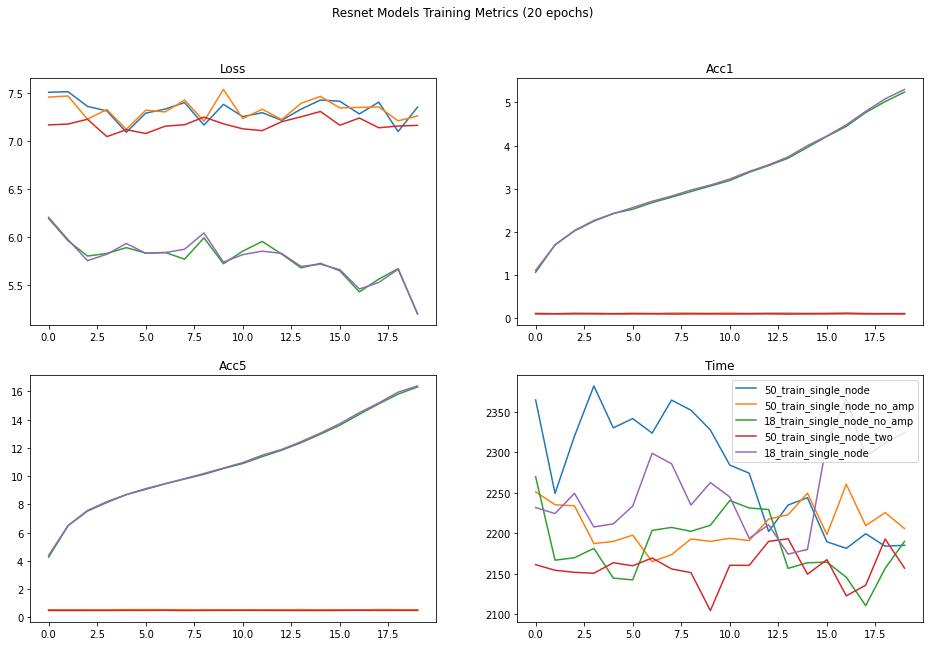

In [160]:
import numpy as np 

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))

fig.suptitle('Resnet Models Training Metrics (20 epochs)')
#ax[0,0].legend()
ax[0,0].set_title('Loss')

#ax[0,1].legend()
ax[0,1].set_title('Acc1')

#ax[1,0].legend()
ax[1,0].set_title('Acc5')

#ax[1,1].legend()
ax[1,1].set_title('Time')

for i in train_metrics_dict.keys(): 
    
    model_dict = train_metrics_dict[i]
    
    ax[0,0].plot(model_dict['Loss'], label = i)
    
    ax[0,1].plot(model_dict['Acc1'], label = i)
    
    ax[1,0].plot(model_dict['Acc5'], label = i)
    
    ax[1,1].plot(model_dict['Time'], label = i)

plt.legend(loc = 'best')

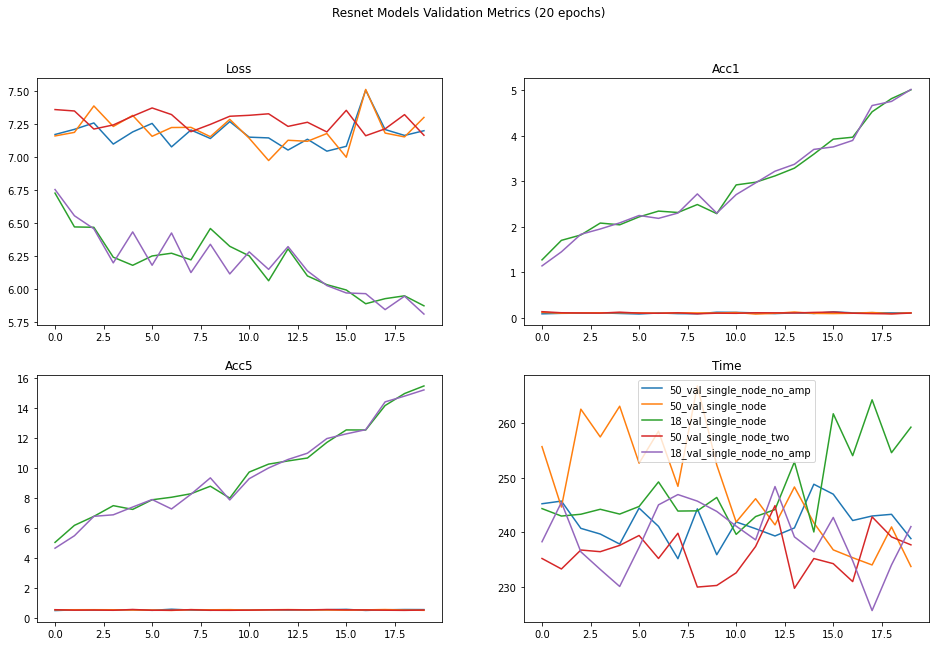

In [162]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))

fig.suptitle('Resnet Models Validation Metrics (20 epochs)')
#ax[0,0].legend()
ax[0,0].set_title('Loss')

#ax[0,1].legend()
ax[0,1].set_title('Acc1')

#ax[1,0].legend()
ax[1,0].set_title('Acc5')

#ax[1,1].legend()
ax[1,1].set_title('Time')

for i in val_metrics_dict.keys(): 
    
    model_dict = val_metrics_dict[i]
    
    ax[0,0].plot(model_dict['Loss'], label = i)
    
    ax[0,1].plot(model_dict['Acc1'], label = i)
    
    ax[1,0].plot(model_dict['Acc5'], label = i)
    
    ax[1,1].plot(model_dict['Time'], label = i)

plt.legend(loc = 'best')

In [169]:
times_list = [] 

for i in train_metrics_dict.keys():
    

    x = np.array(train_metrics_dict[i]['Time'])
    
    
    
    times_list.append([i, x.sum(), x.mean()])


In [171]:
times_list

[['50_train_single_node', 45532.43953537941, 2276.6219767689704],
 ['50_train_single_node_no_amp', 44187.90915679932, 2209.3954578399657],
 ['18_train_single_node_no_amp', 43682.76385521889, 2184.1381927609445],
 ['50_train_single_node_two', 43147.74152803421, 2157.3870764017106],
 ['18_train_single_node', 45050.97309064865, 2252.5486545324325]]

In [173]:
import pandas as pd 

df = pd.DataFrame(times_list, columns = ['Model', 'Total Training @ 20 Epochs (min)', 'Average Epoch (min)'])

In [176]:
df['Total Training @ 20 Epochs (min)'] = df['Total Training @ 20 Epochs (min)']/60

df['Average Epoch (min)'] = df['Average Epoch (min)']/60

In [180]:
df.sort_values(by = 'Total Training @ 20 Epochs (min)').head()

,Model,Total Training @ 20 Epochs (min),Average Epoch (min)
3,50_train_single_node_two,719.129025,35.956451
2,18_train_single_node_no_amp,728.046064,36.402303
1,50_train_single_node_no_amp,736.465153,36.823258
4,18_train_single_node,750.849552,37.542478
0,50_train_single_node,758.873992,37.943700


In [182]:
df

,Model,Total Training @ 20 Epochs (min),Average Epoch (min)
0,50_train_single_node,758.873992,37.943700
1,50_train_single_node_no_amp,736.465153,36.823258
2,18_train_single_node_no_amp,728.046064,36.402303
3,50_train_single_node_two,719.129025,35.956451
4,18_train_single_node,750.849552,37.542478


In [141]:
with open('50_train_single_node.pkl', 'rb') as pk: 
    
    ls = pickle.load(pk)
    
    print(ls[18][-2].val.item())

0.0


In [72]:
for i in ls[0]:
    
    try:
        
        print(i)
        print(i.name, i.avg, i.count, i.sum)
        
    except: 
        
        print(i)
# dir(ls[0][4]) #.avg, .count, .sum, . 

tensor(1.1417, device='cuda:0')
tensor(1.1417, device='cuda:0')
Loss 6.7518e+00 (6.6467e+00)
Loss 6.646651859164374 104759 696296.6021142006
Acc@1   3.64 (  1.14)
Acc@1 tensor(1.1417, device='cuda:0') 104759 tensor(119600., device='cuda:0')
Acc@5   3.64 (  4.64)
Acc@5 tensor(4.6440, device='cuda:0') 104759 tensor(486500., device='cuda:0')
Time  0.422 ( 0.291)
Time 0.2909212487957853 819 238.26450276374817


In [64]:
import matplotlib.pyplot as plt
plt.plot([torch.cpu(i) for i in ls[1]])

TypeError: 'module' object is not callable

In [244]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         485G  231G  254G  48% /
tmpfs            64M     0   64M   0% /dev
tmpfs           7.7G     0  7.7G   0% /sys/fs/cgroup
shm             1.0G   56K  1.0G   1% /dev/shm
/dev/root       485G  231G  254G  48% /etc/hosts
tmpfs           7.7G   12K  7.7G   1% /proc/driver/nvidia
tmpfs           1.6G  996K  1.6G   1% /run/nvidia-persistenced/socket
devtmpfs        7.7G     0  7.7G   0% /dev/nvidia0
tmpfs           7.7G     0  7.7G   0% /proc/acpi
tmpfs           7.7G     0  7.7G   0% /proc/scsi
tmpfs           7.7G     0  7.7G   0% /sys/firmware


In [241]:
os.listdir('Train/657')


['n03485407_496.JPEG',
 'n03485407_4676.JPEG',
 'n03485407_4958.JPEG',
 'n03485407_693.JPEG',
 'n03485407_6231.JPEG',
 'n03485407_257.JPEG',
 'n03485407_7411.JPEG',
 'n03485407_3697.JPEG',
 'n03485407_6373.JPEG',
 'n03485407_3679.JPEG',
 'n03485407_1382.JPEG',
 'n03485407_4322.JPEG',
 'n03485407_1610.JPEG',
 'n03485407_7444.JPEG',
 'n03485407_1795.JPEG',
 'n03485407_3204.JPEG',
 'n03485407_9958.JPEG',
 'n03485407_4449.JPEG',
 'n03485407_2294.JPEG',
 'n03485407_8207.JPEG',
 'n03485407_5360.JPEG',
 'n03485407_1978.JPEG',
 'n03485407_4415.JPEG',
 'n03485407_2131.JPEG',
 'n03485407_16761.JPEG',
 'n03485407_11302.JPEG',
 'n03485407_4490.JPEG',
 'n03485407_3158.JPEG',
 'n03485407_2413.JPEG',
 'n03485407_3276.JPEG',
 'n03485407_20509.JPEG',
 'n03485407_6099.JPEG',
 'n03485407_10481.JPEG',
 'n03485407_9089.JPEG',
 'n03485407_439.JPEG',
 'n03485407_11259.JPEG',
 'n03485407_2340.JPEG',
 'n03485407_163.JPEG',
 'n03485407_1111.JPEG',
 'n03485407_2119.JPEG',
 'n03485407_980.JPEG',
 'n03485407_910.J

In [232]:
os.remove('ILSVRC2012_img_train.tar')

In [243]:
for i in os.listdir('Train'):
    
    if os.path.isdir(f'Train/{i}'):
        
        for j in os.listdir(f'Train/{i}'):
            
            os.remove(f'Train/{i}/{j}')
            
        os.rmdir(f'Train/{i}')
        
    else:
        
        os.remove(f'Train/{i}')
    
os.rmdir('Train')